# CIFAR-10 dataset classification with CNNs

Author: Tanwi Mallick, adapting codes from Bethany Lusch, Prasanna Balprakash, Corey Adams, and Kyle Felker

In this notebook, we'll continue the CIFAR-10 problem using the Keras API (as included in the TensorFlow library) and incorporating convolutional layers.

First, the needed imports.

In [ ]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt
import time

## CIFAR-10 data set

Again we'll load the cifar10 data set. CIFAR-10 dataset contains 32x32 color images from 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. If you haven't downloaded it already, it could take a while.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

170498071/170498071 [==============================] - 4s 0us/step


This time we won't flatten the images. 

The training data (`X_train`) is a 3rd-order tensor of size (50000, 32, 32), i.e. it consists of 50000 images of size 32x32 pixels. 

`y_train` is a 50000-dimensional vector containing the correct classes ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') for each training sample.

## Convolutional neural network (CNN)

CNN is a type of deep learning model for processing data that has a grid pattern, such as images.

Let's use a small model that includes convolutional layers

- The Conv2D layers operate on 2D matrices so we input the images directly to the model.
    - The two Conv2D layers below learn 32 and 64 filters respectively. 
    - They are learning filters for 3x3 windows.
- The MaxPooling2D layer reduces the spatial dimensions, that is, makes the image smaller.
    - It downsamples by taking the maximum value in the window 
    - The pool size of (2, 2) below means the windows are 2x2. 
    - Helps in extracting important features and reduce computation
- The Flatten layer flattens the 2D matrices into vectors, so we can then switch to Dense layers as in the MLP model.

See https://keras.io/layers/convolutional/, https://keras.io/layers/pooling/ for more information.

![conv layer](https://github.com/argonne-lcf/ai-science-training-series/blob/main/03_neural_networks_tensorflow/images/conv_layer.png?raw=1)
Image credit: [Jason Brownlee](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)

![conv layer](https://github.com/argonne-lcf/ai-science-training-series/blob/main/03_neural_networks_tensorflow/images/conv.png?raw=1)
Image credit: [Anh H. Reynolds](https://anhreynolds.com/blogs/cnn.html)


<img src="https://github.com/argonne-lcf/ai-science-training-series/blob/main/03_neural_networks_tensorflow/images/MaxpoolSample2.png?raw=1" width="600" hight="600" align="left"/>

In [ ]:
class CIFAR10Classifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.conv_1 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu')
        self.conv_2 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu')
        self.conv_3 = tf.keras.layers.Conv2D(128, [3, 3], activation='relu')
        self.batch_3=tf.keras.layers.BatchNormalization()
        self.pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_4 = tf.keras.layers.Dropout(0.25)
        self.dense_5 = tf.keras.layers.Dense(128, activation='relu')
        self.drop_6 = tf.keras.layers.Dropout(0.5)
        self.dense_7 = tf.keras.layers.Dense(10, activation='softmax')
        
    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.conv_2(x)
        x= self.conv_3(x)
        x=self.batch_3(x)
        x = self.pool_3(x)
        x = self.drop_4(x)
        x = tf.keras.layers.Flatten()(x)
        x = self.dense_5(x)
        x = self.drop_6(x)
        x = self.dense_7(x)
        

        return x

### Simple training

Here is a concise way to train the network, like we did in the previous notebook. We'll see a more verbose approach below that allows more performance tuning.

In [ ]:
def train_network_concise(_batch_size, _n_training_epochs, _lr):

    cnn_model = CIFAR10Classifier()

    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    history = cnn_model.fit(x_train, y_train, batch_size=_batch_size, epochs=_n_training_epochs)
    return history, cnn_model

In [ ]:
# This took 43 seconds per epoch on my laptop
batch_size = 512
epochs = 10
lr = .01
history, cnn_model = train_network_concise(batch_size, epochs, lr)

Epoch 1/10
98/98 [==============================] - 551s 6s/step - loss: 1.5944 - accuracy: 0.4352
Epoch 2/10
98/98 [==============================] - 554s 6s/step - loss: 1.1275 - accuracy: 0.6072
Epoch 3/10
98/98 [==============================] - 554s 6s/step - loss: 0.9525 - accuracy: 0.6682
Epoch 4/10
98/98 [==============================] - 547s 6s/step - loss: 0.8282 - accuracy: 0.7088
Epoch 5/10
98/98 [==============================] - 545s 6s/step - loss: 0.7373 - accuracy: 0.7412
Epoch 6/10
98/98 [==============================] - 545s 6s/step - loss: 0.6609 - accuracy: 0.7664
Epoch 7/10
98/98 [==============================] - 548s 6s/step - loss: 0.5947 - accuracy: 0.7893
Epoch 8/10
98/98 [==============================] - 548s 6s/step - loss: 0.5413 - accuracy: 0.8076
Epoch 9/10
98/98 [==============================] - 548s 6s/step - loss: 0.4893 - accuracy: 0.8259
Epoch 10/10
98/98 [==============================] - 549s 6s/step - loss: 0.4421 - accuracy: 0.8415


Accuracy for test data.  The model should be better than the non-convolutional model even if you're only patient enough for three epochs. 

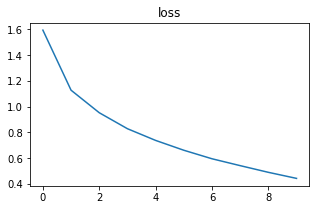

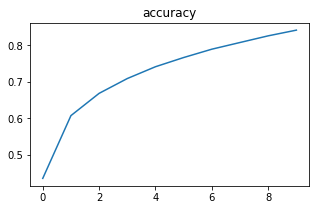

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

### Inference

With enough training epochs, the test accuracy should exceed 96.53%.

You can compare your result with the state-of-the art [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html). 

In [ ]:
%%time
x_test_reshaped = numpy.expand_dims(x_test, -1)
scores = cnn_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

313/313 - 27s - loss: 0.8762 - accuracy: 0.7261 - 27s/epoch - 88ms/step
accuracy: 72.61%
CPU times: user 51.9 s, sys: 556 ms, total: 52.4 s
Wall time: 28.4 s


We can also again check the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix (rows: true classes; columns: predicted classes):'); print()
predictions = cnn_model.predict(x_test)
cm=confusion_matrix(y_test, numpy.argmax(predictions, axis=1), labels=list(range(10)))
print(cm); print()

print('Classification accuracy for each class:'); print()
for i,j in enumerate(cm.diagonal()/cm.sum(axis=1)): print("%d: %.4f" % (i,j))

Confusion matrix (rows: true classes; columns: predicted classes):

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[594  42  43  34  11  14  26  20  94 122]
 [  7 742   1  10   0   3  17   6  12 202]
 [ 72  20 299 102  85 147 147  67  19  42]
 [ 12  14  30 484  33 187 113  60   6  61]
 [ 33  12  74 118 320  56 192 160   8  27]
 [  8   6  31 238  30 541  38  73  11  24]
 [  1   9  28 108  27  24 759  20   3  21]
 [  8   4

### More verbose training

This approach explicitly handles the looping over data. It will be helpful in future weeks for diving in and optimizing

In [ ]:
def compute_loss(y_true, y_pred):
    # if labels are integers, use sparse categorical crossentropy
    # network's final layer is softmax, so from_logtis=False
    scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    # if labels are one-hot encoded, use standard crossentropy

    return scce(y_true, y_pred)  

In [ ]:
def forward_pass(model, batch_data, y_true):
    y_pred = model(batch_data)
    loss = compute_loss(y_true, y_pred)
    return loss

In [ ]:
# Here is a function that will manage the training loop for us:

def train_loop(batch_size, n_training_epochs, model, opt):
    
    @tf.function()
    def train_iteration(data, y_true, model, opt):
        with tf.GradientTape() as tape:
            loss = forward_pass(model, data, y_true)

        trainable_vars = model.trainable_variables

        # Apply the update to the network (one at a time):
        grads = tape.gradient(loss, trainable_vars)

        opt.apply_gradients(zip(grads, trainable_vars))
        return loss

    for i_epoch in range(n_training_epochs):
        print("beginning epoch %d" % i_epoch)
        start = time.time()

        epoch_steps = int(50000/batch_size)
        dataset.shuffle(50000) # Shuffle the whole dataset in memory
        batches = dataset.batch(batch_size=batch_size, drop_remainder=True)
        
        for i_batch, (batch_data, y_true) in enumerate(batches):
            batch_data = tf.reshape(batch_data, [-1, 32, 32, 3])
            loss = train_iteration(batch_data, y_true, model, opt)
            
        end = time.time()
        print("took %1.1f seconds for epoch #%d" % (end-start, i_epoch))

In [ ]:
def train_network(_batch_size, _n_training_epochs, _lr):

    cifar_model = CIFAR10Classifier()

    opt = tf.keras.optimizers.Adam(_lr)

    train_loop(_batch_size, _n_training_epochs, cifar_model, opt)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset.shuffle(50000)

batch_size = 512
epochs = 3
lr = .01
train_network(batch_size, epochs, lr)

beginning epoch 0
took 508.6 seconds for epoch #0
beginning epoch 1
took 503.0 seconds for epoch #1
beginning epoch 2
took 527.1 seconds for epoch #2


# Homework: improve the accuracy of this model

Update this notebook to ensure more accuracy. How high can it be raised? Changes like increasing the number of epochs, altering the learning rate, altering the number of neurons the hidden layer, chnaging the optimizer, etc. could be made directly in the notebook. You can also change the model specification by expanding the network's layer. The current notebook's training accuracy is roughly 58.69%, although it varies randomly.

The CNN model was modified to include the following

* A convolutional Layer of size 32
* A batch normalisation layer
Also, the number of epochs was increased to 20.The training accuracy achieved for this model is 91%.

In [ ]:
import tensorflow as tf

import numpy
import matplotlib.pyplot as plt
import time

class CIFAR10Classifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.conv_1 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu')
        self.conv_2 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu')
        self.conv_3 = tf.keras.layers.Conv2D(128, [3, 3], activation='relu')
        self.batch_3=tf.keras.layers.BatchNormalization()
        self.pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_4 = tf.keras.layers.Dropout(0.25)
        self.dense_5 = tf.keras.layers.Dense(128, activation='relu')
        self.drop_6 = tf.keras.layers.Dropout(0.5)
        self.dense_7 = tf.keras.layers.Dense(10, activation='softmax')
        
    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.conv_2(x)
        x= self.conv_3(x)
        x=self.batch_3(x)
        x = self.pool_3(x)
        x = self.drop_4(x)
        x = tf.keras.layers.Flatten()(x)
        x = self.dense_5(x)
        x = self.drop_6(x)
        x = self.dense_7(x)
        

        return x

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

170498071/170498071 [==============================] - 3s 0us/step


Network Training 

In [ ]:
def train_network_concise(_batch_size, _n_training_epochs, _lr):

    cnn_model = CIFAR10Classifier()

    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    history = cnn_model.fit(x_train, y_train, batch_size=_batch_size, epochs=_n_training_epochs)
    return history, cnn_model

In [ ]:
batch_size = 512
epochs = 20
lr = .01
history, cnn_model = train_network_concise(batch_size, epochs, lr)

Epoch 1/20
98/98 [==============================] - 326s 3s/step - loss: 1.5467 - accuracy: 0.4546
Epoch 2/20
98/98 [==============================] - 323s 3s/step - loss: 1.1082 - accuracy: 0.6127
Epoch 3/20
98/98 [==============================] - 325s 3s/step - loss: 0.9359 - accuracy: 0.6727
Epoch 4/20
98/98 [==============================] - 324s 3s/step - loss: 0.8215 - accuracy: 0.7120
Epoch 5/20
98/98 [==============================] - 325s 3s/step - loss: 0.7221 - accuracy: 0.7472
Epoch 6/20
98/98 [==============================] - 324s 3s/step - loss: 0.6355 - accuracy: 0.7745
Epoch 7/20
98/98 [==============================] - 324s 3s/step - loss: 0.5675 - accuracy: 0.8003
Epoch 8/20
98/98 [==============================] - 323s 3s/step - loss: 0.5103 - accuracy: 0.8191
Epoch 9/20
98/98 [==============================] - 324s 3s/step - loss: 0.4533 - accuracy: 0.8383
Epoch 10/20
98/98 [==============================] - 325s 3s/step - loss: 0.4138 - accuracy: 0.8512
Epoch 11/

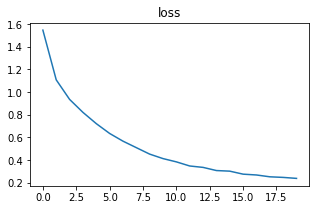

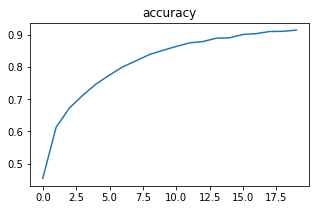

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

The CNN model was modified to include the following
*   A convolutional Layer of size 32
*   A batch normalisation layer

Also, the number of epochs was increased to 20.The training accuracy achieved for this model is 91%.